# Inequalities of Marseille a long the metro M2

In [5]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import json
import matplotlib.pyplot as plt

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
#matplotlib.rcParams['svg.fonttype'] = 'none'

In [6]:
#iris selction
iris_csv = 'iris_selection.csv'

iris_selection = pd.read_csv(iris_csv, header=0, names=['ligne', 'code_iris', 'lib_iris'])

In [7]:
iris_selection['code_iris'] = iris_selection['code_iris'].astype('str')

In [8]:
iris_selection['code_iris'].nunique()

50

## Revenus

Data from: https://www.insee.fr/fr/statistiques/3288151, from December 2014

In [10]:
#file path
revenu_file = 'data/BASE_TD_FILO_DEC_IRIS_2014.xls'

revenu = pd.read_excel(revenu_file, skiprows=5)

In [11]:
revenu['IRIS'] = revenu['IRIS'].astype('str')

In [34]:
revenu_m2 = iris_selection.merge(revenu, left_on='code_iris', right_on='IRIS')

In [36]:
revenu_m2.head()

,ligne,code_iris,lib_iris,IRIS,LIBIRIS,COM,LIBCOM,DEC_PIMP14,DEC_TP6014,DEC_Q114,...,DEC_D914,DEC_RD14,DEC_S80S2014,DEC_GI14,DEC_PTSA14,DEC_PCHO14,DEC_PBEN14,DEC_PPEN14,DEC_PAUT14,note
0,Bougainville,132150501,Zoccolat,132150501,Zoccolat,13215,Marseille 15e Arrondissement,13.441483,83.960059,1738.0,...,15030.0,NaN,1421.814867,0.502808,55.3,11.8,0.5,30.6,1.8,0
1,Bougainville,132140302,Casanova,132140302,Casanova,13214,Marseille 14e Arrondissement,27.017115,70.221704,870.0,...,20968.0,NaN,2267.168856,0.544484,55.1,6.3,1.6,34.8,2.2,0
2,National,132030304,Briancon,132030304,Briancon,13203,Marseille 3e Arrondissement,NaN,79.588993,2488.0,...,15916.0,NaN,140.373675,0.482422,NaN,NaN,NaN,NaN,NaN,0
3,National,132030306,Bellevue-Pyat,132030306,Bellevue-Pyat,13203,Marseille 3e Arrondissement,NaN,NaN,212.0,...,13504.0,NaN,NaN,0.534798,NaN,NaN,NaN,NaN,NaN,0
4,National,132030403,Fonscolombes,132030403,Fonscolombes,13203,Marseille 3e Arrondissement,21.021611,74.336283,2723.0,...,19686.0,NaN,99.594715,0.511922,61.8,8.7,3.0,25.5,1.0,0


In [40]:
revenu_m2_median = revenu_m2.groupby(['ligne'], sort=False).DEC_MED14.mean()

In [41]:
revenu_m2_median

ligne
Bougainville                          5879.000000
National                              6103.333333
Désirée Clary                         8318.000000
Joliette                             12854.250000
Jules Guesde                          7238.800000
Saint-Charles                         9848.000000
Noailles                              8763.500000
Notre-Dame-du-Mont - Cours Julien    18334.666667
Castellane                           20032.000000
Périer                               27578.800000
Rond-point du Prado                  24451.500000
Sainte-Marguerite Dromel             18033.000000
Name: DEC_MED14, dtype: float64

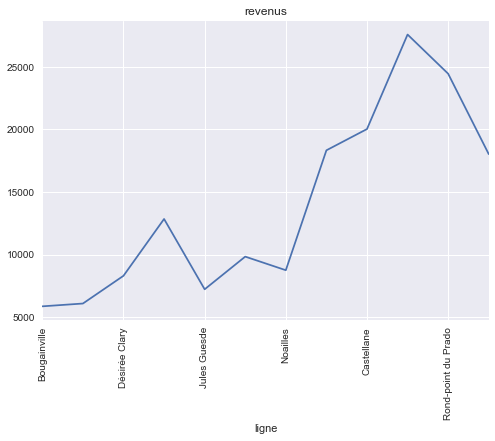

In [92]:
revenu_m2_median.plot(kind='line', rot=90, title='revenus')

## Population

Newest version I found so far: https://www.insee.fr/fr/statistiques/2386737

In [43]:
#file path
population_file = 'data/base-ic-evol-struct-pop-2013.xls'

population = pd.read_excel(population_file, skiprows=5)

In [45]:
population['IRIS'] = population['IRIS'].astype('str')

In [46]:
population_m2 = iris_selection.merge(population, left_on='code_iris', right_on='IRIS')

In [48]:
population_m2.head()

,ligne,code_iris,lib_iris,IRIS,REG,REG2016,DEP,UU2010,COM,LIBCOM,...,C13_F15P_CS4,C13_F15P_CS5,C13_F15P_CS6,C13_F15P_CS7,C13_F15P_CS8,P13_POP_FR,P13_POP_ETR,P13_POP_IMM,P13_PMEN,P13_PHORMEN
0,Bougainville,132150501,Zoccolat,132150501,93,93,13,00759,13215,Marseille 15e Arrondissement,...,23.994053,147.361614,45.402013,64.991781,637.669842,2192.122047,773.144619,763.636369,2819.267289,145.999377
1,Bougainville,132140302,Casanova,132140302,93,93,13,00759,13214,Marseille 14e Arrondissement,...,48.905068,139.170441,33.237124,227.407807,321.148090,1651.147440,300.817321,406.053010,1919.964845,31.999916
2,National,132030304,Briancon,132030304,93,93,13,00759,13203,Marseille 3e Arrondissement,...,11.871886,147.077728,3.548990,79.771603,250.011373,1073.327766,298.924237,429.929506,1372.252003,0.000000
3,National,132030305,Bellevue Caravelle,132030305,93,93,13,00759,13203,Marseille 3e Arrondissement,...,26.532188,109.124562,29.747276,33.706547,290.913835,1072.404399,377.575131,387.722059,1449.979530,0.000000
4,National,132030306,Bellevue-Pyat,132030306,93,93,13,00759,13203,Marseille 3e Arrondissement,...,0.000000,51.400881,16.531057,53.741254,250.611704,793.624920,252.051419,379.315973,1045.676339,0.000000


In [124]:
population_m2_pop_total = population_m2.groupby(['ligne'], sort=False).P13_POP.sum()

In [125]:
population_m2_pop_total

ligne
Bougainville                          4917.231427
National                              6615.003177
Désirée Clary                         7520.182322
Joliette                              7462.314934
Jules Guesde                          9616.166554
Saint-Charles                         9028.986516
Noailles                              9239.722659
Notre-Dame-du-Mont - Cours Julien     7090.619017
Castellane                           15804.936150
Périer                               11441.643608
Rond-point du Prado                  12169.834349
Sainte-Marguerite Dromel              7264.330429
Name: P13_POP, dtype: float64

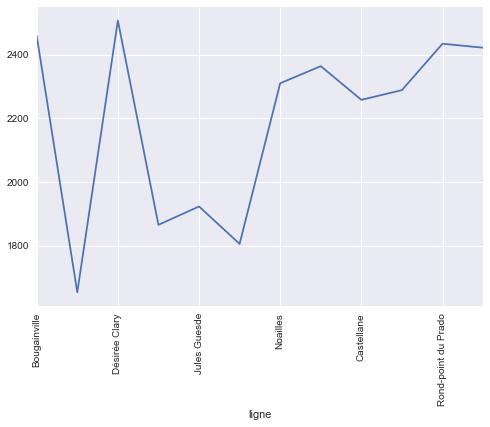

In [88]:
population_m2_pop_total.plot(kind='line', rot=90)

### Hommes et femmes

In [141]:
# nombre d'hommes

population_m2_pop_gender = population_m2.groupby(['ligne'], sort=False, as_index=False)['P13_POP', 'P13_POPH', 'P13_POPF'].sum()

In [143]:
population_m2_pop_gender['percent_man'] = population_m2_pop_gender['P13_POPH'] * 100 / population_m2_pop_gender['P13_POP']

population_m2_pop_gender['percent_woman'] = population_m2_pop_gender['P13_POPF'] * 100 / population_m2_pop_gender['P13_POP']


In [144]:
population_m2_pop_gender

,ligne,P13_POP,P13_POPH,P13_POPF,percent_man,percent_woman
0,Bougainville,4917.231427,2578.701833,2338.529594,52.442149,47.557851
1,National,6615.003177,3236.424708,3378.578469,48.925520,51.074480
2,Désirée Clary,7520.182322,3590.526936,3929.655386,47.745211,52.254789
3,Joliette,7462.314934,3808.950405,3653.364530,51.042477,48.957523
4,Jules Guesde,9616.166554,5101.915365,4514.251189,53.055605,46.944395
5,Saint-Charles,9028.986516,4811.961882,4217.024634,53.294596,46.705404
6,Noailles,9239.722659,4867.969914,4371.752744,52.685238,47.314762
7,Notre-Dame-du-Mont - Cours Julien,7090.619017,3327.398937,3763.220080,46.926776,53.073224
8,Castellane,15804.936150,7116.508580,8688.427570,45.027126,54.972874
9,Périer,11441.643608,5191.740602,6249.903006,45.375829,54.624171


### Immigration

In [126]:
# nombre d'immigrés / "Migrationshintergrund"

population_m2_pop_imm = population_m2.groupby(['ligne'], sort=False).P13_POP_IMM.sum()

In [127]:
population_m2_pop_imm

ligne
Bougainville                         1169.689380
National                             2109.351551
Désirée Clary                        2061.234710
Joliette                             1587.246478
Jules Guesde                         3113.567807
Saint-Charles                        3079.284555
Noailles                             2932.162186
Notre-Dame-du-Mont - Cours Julien     925.926416
Castellane                           1838.461038
Périer                               1260.805257
Rond-point du Prado                  1290.766834
Sainte-Marguerite Dromel              882.848369
Name: P13_POP_IMM, dtype: float64

In [129]:
# nombre de français

population_m2_pop_fr = population_m2.groupby(['ligne'], sort=False).P13_POP_FR.sum()

In [130]:
population_m2_pop_fr

ligne
Bougainville                          3843.269487
National                              5118.639479
Désirée Clary                         5915.838500
Joliette                              6324.065875
Jules Guesde                          7328.681359
Saint-Charles                         6590.516990
Noailles                              7098.623024
Notre-Dame-du-Mont - Cours Julien     6449.163055
Castellane                           14570.440712
Périer                               10647.988472
Rond-point du Prado                  11499.516104
Sainte-Marguerite Dromel              6817.399341
Name: P13_POP_FR, dtype: float64

In [132]:
# nombre d'étrangers

population_m2_pop_etr = population_m2.groupby(['ligne'], sort=False).P13_POP_ETR.sum()

In [133]:
population_m2_pop_etr

ligne
Bougainville                         1073.961940
National                             1496.363698
Désirée Clary                        1604.343822
Joliette                             1138.249059
Jules Guesde                         2287.485195
Saint-Charles                        2438.469526
Noailles                             2141.099635
Notre-Dame-du-Mont - Cours Julien     641.455962
Castellane                           1234.495438
Périer                                793.655136
Rond-point du Prado                   670.318245
Sainte-Marguerite Dromel              446.931088
Name: P13_POP_ETR, dtype: float64

In [134]:
population_m2_immigration_df = pd.concat([population_m2_pop_total, population_m2_pop_etr, population_m2_pop_fr, population_m2_pop_imm], axis=1).reset_index()

In [135]:
population_m2_immigration_df['percent_immigration'] = population_m2_immigration_df['P13_POP_IMM'] * 100 / population_m2_immigration_df['P13_POP'] 

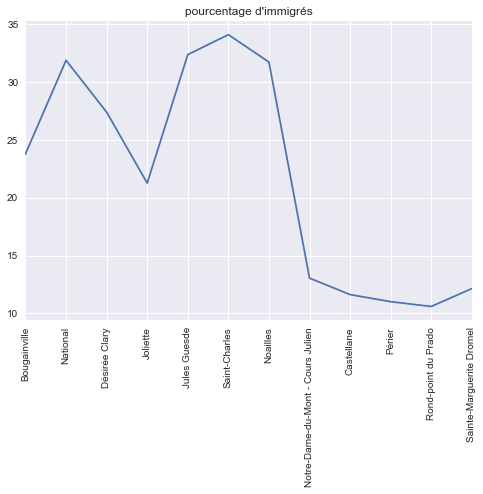

In [136]:
ax = population_m2_immigration_df['percent_immigration'].plot(xticks=population_m2_immigration_df.index, rot=90, title="pourcentage d'immigrés")
ax.set_xticklabels(population_m2_immigration_df.ligne)

### Age

In [160]:
# age, under 18, over 65

population_m2_pop_age = population_m2.groupby(['ligne'], sort=False, as_index=False)['P13_POP','P13_POP0002', 'P13_POP0305', 'P13_POP0610', 'P13_POP1117', 'P13_POP6579', 'P13_POP80P'].sum()

population_m2_pop_age['total_under_18'] = population_m2_pop_age['P13_POP0002'] + population_m2_pop_age['P13_POP0305'] + population_m2_pop_age['P13_POP0610'] + population_m2_pop_age['P13_POP1117']

population_m2_pop_age['total_over_65'] = population_m2_pop_age['P13_POP6579'] + population_m2_pop_age['P13_POP80P']

In [161]:
population_m2_pop_age['percent_under18'] = population_m2_pop_age['total_under_18'] * 100 / population_m2_pop_age['P13_POP']

population_m2_pop_age['percent_over65'] = population_m2_pop_age['total_over_65'] * 100 / population_m2_pop_age['P13_POP'] 

In [162]:
population_m2_pop_age = population_m2_pop_age[['ligne', 'total_under_18', 'total_over_65', 'percent_under18', 'percent_over65']]

In [163]:
population_m2_pop_age

,ligne,total_under_18,total_over_65,percent_under18,percent_over65
0,Bougainville,1489.808985,794.033218,30.297719,16.147973
1,National,2360.982324,616.830219,35.691326,9.324715
2,Désirée Clary,1919.618960,1265.982719,25.526229,16.834468
3,Joliette,1662.519871,942.861237,22.278876,12.634970
4,Jules Guesde,2113.617990,1653.062742,21.979840,17.190455
5,Saint-Charles,2089.089609,1095.290282,23.137587,12.130822
6,Noailles,1799.370864,1046.478169,19.474295,11.325861
7,Notre-Dame-du-Mont - Cours Julien,1219.954664,920.578568,17.205193,12.983049
8,Castellane,2497.402545,3263.952664,15.801409,20.651476
9,Périer,2037.736991,2634.462756,17.809828,23.025213


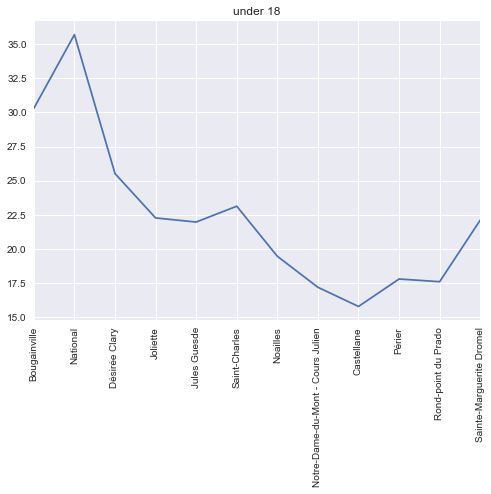

In [164]:
ax = population_m2_pop_age['percent_under18'].plot(xticks=population_m2_pop_age.index, rot=90, title="under 18")
ax.set_xticklabels(population_m2_pop_age.ligne)

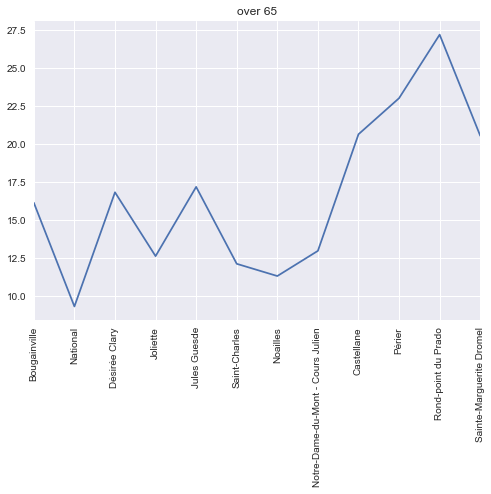

In [165]:
ax = population_m2_pop_age['percent_over65'].plot(xticks=population_m2_pop_age.index, rot=90, title="over 65")
ax.set_xticklabels(population_m2_pop_age.ligne)

In [3]:
from simpledbf import Dbf5

dbf_logement = Dbf5('data/FD_LOGEMTZE_2014.dbf')

df_logement = dbf_logement.to_dataframe()

In [4]:
df_logement

,COMMUNE,ARM,IRIS,ACHL,AEMM,AEMMR,AGEMEN8,ANEM,ANEMR,ASCEN,...,STOCD,SURF,TACTM,TPM,TRANSM,TRIRIS,TYPC,TYPL,VOIT,WC
0,01001,ZZZZZ,ZZZZZZZZZ,311,2013,9,25,003,01,2,...,21,6,11,1,4,ZZZZZZ,1,1,2,Z
1,01001,ZZZZZ,ZZZZZZZZZ,311,2011,9,25,005,02,2,...,10,5,11,1,4,ZZZZZZ,1,1,2,Z
2,01001,ZZZZZ,ZZZZZZZZZ,212,1974,6,65,042,06,2,...,10,4,21,Z,Z,ZZZZZZ,1,1,1,Z
3,01001,ZZZZZ,ZZZZZZZZZ,311,2000,9,65,016,03,2,...,10,5,21,Z,Z,ZZZZZZ,1,1,1,Z
4,01001,ZZZZZ,ZZZZZZZZZ,212,1988,7,80,028,04,2,...,10,7,21,Z,Z,ZZZZZZ,1,1,0,Z
5,01001,ZZZZZ,ZZZZZZZZZ,212,2015,9,15,001,00,2,...,23,4,25,Z,Z,ZZZZZZ,2,1,2,Z
6,01001,ZZZZZ,ZZZZZZZZZ,212,1981,7,65,035,05,2,...,10,6,21,Z,Z,ZZZZZZ,1,1,2,Z
7,01001,ZZZZZ,ZZZZZZZZZ,211,0000,0,YY,999,99,2,...,00,7,YY,Y,Y,ZZZZZZ,2,1,X,Z
8,01001,ZZZZZ,ZZZZZZZZZ,112,1983,7,80,033,05,2,...,10,7,21,Z,Z,ZZZZZZ,1,1,0,Z
9,01001,ZZZZZ,ZZZZZZZZZ,212,1988,7,55,028,04,2,...,10,4,11,1,4,ZZZZZZ,1,1,2,Z


In [12]:
df_logement['IRIS'] = df_logement['IRIS'].astype('str')

In [13]:
logement_m2 = iris_selection.merge(df_logement, left_on='code_iris', right_on='IRIS')

In [15]:
logement_m2.to_csv('data/logement_m2.csv')